In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
# electric

In [3]:
xls = pd.ExcelFile(r'../../data/raw/electric-3501-validation.xlsx')

In [4]:
electric = pd.read_excel(xls, 'Sheet1') 

In [5]:
electric['date'] = pd.to_datetime(electric['date'])

In [6]:
### We recived four seprated datasets from UMTS

In [7]:
### UMTS

In [8]:
xls = pd.ExcelFile(r'../../data/raw/fuel-export-20130701-20220712.xlsx')

In [9]:
df1 = pd.read_excel(xls, 'in')

In [10]:
df1.head()

,timestamp,bus_number,gallons,mileage,previous_mileage
0,2013-07-01 03:38:00,3214,39.3,222553,222371.0
1,2013-07-01 03:05:00,3301,33.2,42486,42289.0
2,2013-07-01 22:16:00,3214,21.5,222670,222553.0
3,2013-07-01 22:20:00,3224,5.2,151729,151686.0
4,2013-07-02 00:25:00,3226,11.2,152869,152807.0


In [11]:
df1['bus_number'].unique()

array([3214, 3301, 3224, 3226, 3228, 3303, 3306, 3304, 3227, 3205, 3305,
       3309, 3203, 3212, 3225, 3221, 3202, 3213, 3201, 3307, 3310, 3222,
       3308, 3123, 3223, 3121, 3211, 3204, 3115, 3119, 3112, 3118, 3122,
       3215, 3401, 3402, 3302, 3311, 3312, 3315, 3314, 3313, 3318, 3316,
       3317, 3319, 3320, 3321, 3322, 3323, 3501, 3324, 3325, 3326],
      dtype=int64)

In [12]:
df1.tail()

,timestamp,bus_number,gallons,mileage,previous_mileage
60396,2022-07-12 01:42:00,3322,20.9,41209,41103.0
60397,2022-07-12 01:49:00,3225,38.7,423501,423351.0
60398,2022-07-12 01:51:00,3317,27.2,53363,53196.0
60399,2022-07-12 01:54:00,3301,43.6,324801,324552.0
60400,2022-07-12 01:58:00,3323,46.2,25241,25036.0


In [13]:
df1['timestamp']= pd.to_datetime(df1['timestamp'])

In [14]:
len(df1['bus_number'].unique())

54

In [15]:
df1.sort_values(by=['bus_number','timestamp'], ascending=True, inplace=True)

In [16]:
df1['date'] = pd.to_datetime(df1['timestamp']).dt.date
df1['time'] = pd.to_datetime(df1['timestamp']).dt.time

In [17]:
#df1.head()

In [18]:
df1['date']=df1['date'].astype(str)

In [19]:
len(df1['date'].unique())

3265

In [20]:
# df1

In [21]:
df1['time_delta'] = df1.groupby(['bus_number', 'date'])['timestamp'].diff()

In [22]:
df1['distance'] = df1.groupby(['bus_number', 'date'])['mileage'].diff()

In [23]:
df1['time_delta'].max()

Timedelta('0 days 23:59:00')

In [24]:
df1['time_delta'].min()

Timedelta('0 days 00:00:00')

In [25]:
df1['distance'].max()

828945.0

In [26]:
df1['distance'].min()

-800000.0

In [27]:
df1.head()

,timestamp,bus_number,gallons,mileage,previous_mileage,date,time,time_delta,distance
296,2013-08-01 15:53:00,3112,2.4,263624,263581.0,2013-08-01,15:53:00,NaT,NaN
628,2013-09-03 22:49:00,3112,38.3,263752,263624.0,2013-09-03,22:49:00,NaT,NaN
656,2013-09-04 22:46:00,3112,30.6,263860,263752.0,2013-09-04,22:46:00,NaT,NaN
689,2013-09-05 22:44:00,3112,25.4,263949,263860.0,2013-09-05,22:44:00,NaT,NaN
722,2013-09-06 22:41:00,3112,4.2,263966,263949.0,2013-09-06,22:41:00,NaT,NaN


In [28]:
df1.time_delta=df1.time_delta.astype(str).str.replace('0 days ', '')

In [29]:
df1.head()

,timestamp,bus_number,gallons,mileage,previous_mileage,date,time,time_delta,distance
296,2013-08-01 15:53:00,3112,2.4,263624,263581.0,2013-08-01,15:53:00,NaT,NaN
628,2013-09-03 22:49:00,3112,38.3,263752,263624.0,2013-09-03,22:49:00,NaT,NaN
656,2013-09-04 22:46:00,3112,30.6,263860,263752.0,2013-09-04,22:46:00,NaT,NaN
689,2013-09-05 22:44:00,3112,25.4,263949,263860.0,2013-09-05,22:44:00,NaT,NaN
722,2013-09-06 22:41:00,3112,4.2,263966,263949.0,2013-09-06,22:41:00,NaT,NaN


In [30]:
df1['time_delta']= pd.to_datetime(df1['time_delta'])

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60401 entries, 296 to 60316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         60401 non-null  datetime64[ns]
 1   bus_number        60401 non-null  int64         
 2   gallons           60400 non-null  float64       
 3   mileage           60401 non-null  int64         
 4   previous_mileage  60361 non-null  float64       
 5   date              60401 non-null  object        
 6   time              60401 non-null  object        
 7   time_delta        11546 non-null  datetime64[ns]
 8   distance          11546 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 4.6+ MB


In [32]:
df1['time_delta_in_seconds'] = df1['time_delta'].dt.hour * 3600 + df1['time_delta'].dt.minute * 60 + df1['time_delta'].dt.second

In [33]:
df1.head()

,timestamp,bus_number,gallons,mileage,previous_mileage,date,time,time_delta,distance,time_delta_in_seconds
296,2013-08-01 15:53:00,3112,2.4,263624,263581.0,2013-08-01,15:53:00,NaT,NaN,NaN
628,2013-09-03 22:49:00,3112,38.3,263752,263624.0,2013-09-03,22:49:00,NaT,NaN,NaN
656,2013-09-04 22:46:00,3112,30.6,263860,263752.0,2013-09-04,22:46:00,NaT,NaN,NaN
689,2013-09-05 22:44:00,3112,25.4,263949,263860.0,2013-09-05,22:44:00,NaT,NaN,NaN
722,2013-09-06 22:41:00,3112,4.2,263966,263949.0,2013-09-06,22:41:00,NaT,NaN,NaN


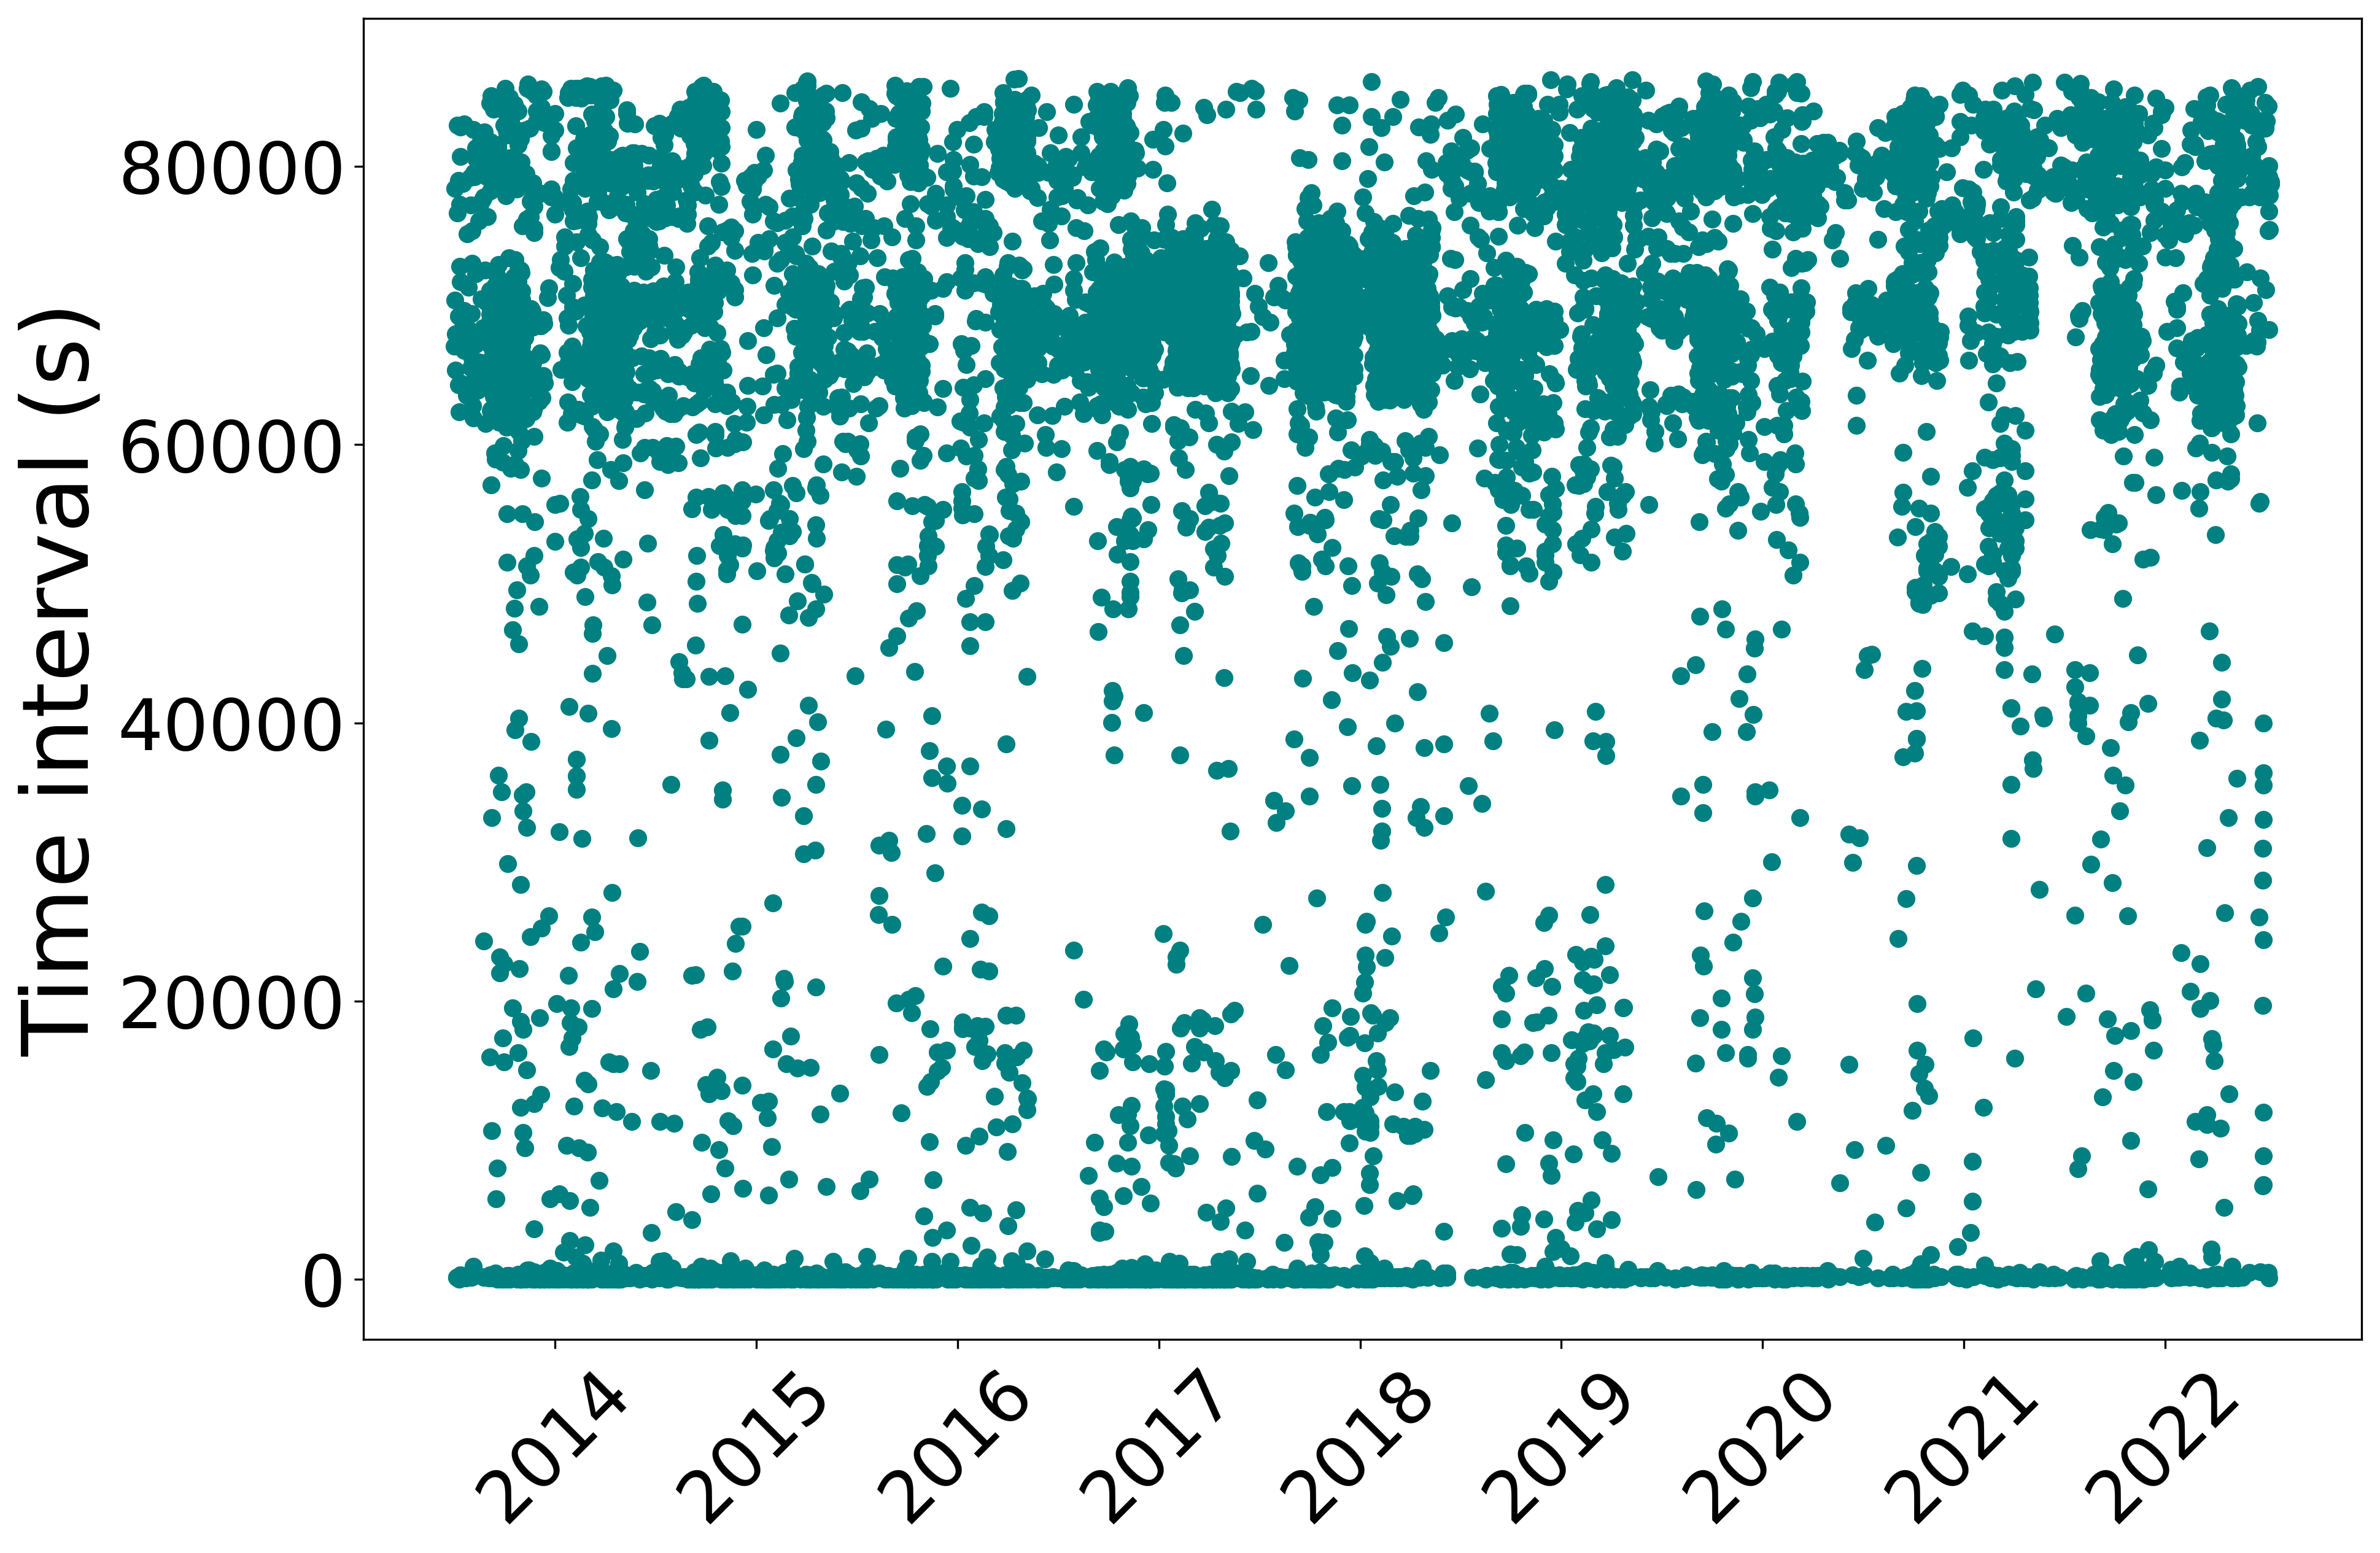

In [34]:
figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=df1['timestamp']  , y=df1["time_delta_in_seconds"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
plt.ylabel("Time interval (s)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
plt.savefig(r'../../figures/time-intervals-fuel-filling-UMTS.png', dpi=400, bbox_inches='tight')
plt.show()

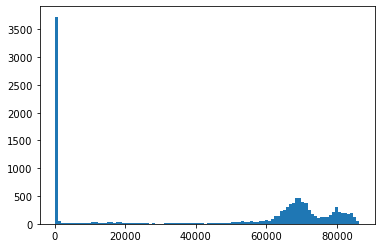

In [35]:
plt.hist(df1['time_delta_in_seconds'], bins=100)
plt.show()

In [36]:
df1['time_delta_in_seconds'].max()

86340.0

In [37]:
df1['time_delta_in_seconds'].min()

0.0

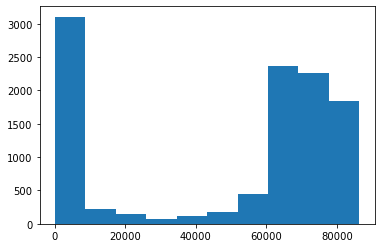

In [38]:
df_time_intervals = df1[df1['time_delta_in_seconds'] > 0]
plt.hist(df_time_intervals['time_delta_in_seconds'])
plt.savefig(r'../../figures/hist-time-intervals-fuel-filling-UMTS.png', dpi=400, bbox_inches='tight')
plt.show()

In [39]:
### CTF (Cottage Street)

In [40]:
xls = pd.ExcelFile(r'../../data/tidy/large/CTF Fuel Tickets FY22.xlsx')

In [41]:
df2 = pd.read_excel(xls, 'CTF')

In [42]:
df2.head()

,model,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type
0,2006 GILLIG 30`,1406,44.36,2021-07-01 20:53:00,376123,DIE
1,2006 GILLIG 30`,1406,8.06,2021-07-02 15:15:00,376170,DIE
2,2006 GILLIG 35`,1510,21.07,2021-07-02 15:30:00,739085,DIE
3,2006 GILLIG 35`,1510,44.99,2021-07-03 20:57:00,739308,DIE
4,2006 GILLIG 35`,1510,32.45,2021-07-04 19:49:00,739464,DIE


In [43]:
df2['Transaction Date']= pd.to_datetime(df2['Transaction Date'])
df2['Transaction Date'].unique()

array(['2021-07-01T20:53:00.000000000', '2021-07-02T15:15:00.000000000',
       '2021-07-02T15:30:00.000000000', ...,
       '2021-10-21T15:39:00.000000000', '2021-10-22T08:34:00.000000000',
       '2021-10-25T15:30:00.000000000'], dtype='datetime64[ns]')

In [44]:
df2['model'].unique()

array(['2006 GILLIG 30`', '2006 GILLIG 35`', '2006 GILLIG 40`',
       '2007 GILLIG 40`', '2008 GILLIG 35`', '2008 GILLIG 40`',
       '2010 GILLIG 35`', '2010 GILLIG 40`', '2011 NEW FLYER XD35',
       '2011 NEW FLYER XD40', '2011 NEW FLYER XD40 (HYBRID)',
       '2012 NEW FLYER XD40', '2014 NEW FLYER XD40',
       '2015 NEW FLYER XD35', '2015 NEW FLYER XD40', '2018 GILLIG 40`',
       '2020 NEW FLYER XD35', '2020 NEW FLYER XD40',
       '2020 PROTERRA CATALYST BE-40 (ELECTRIC)', '2021 NEW FLYER XD35',
       '2021 NEW FLYER XD40', '2021 NEW FLYER XE35 (ELECTRIC)',
       '2021 NEW FLYER XE40 (ELECTRIC)', '2022 NEW FLYER XD35',
       '2022 NEW FLYER XD40', 'UMTS GILLIG', 'UMTS NEW FLYER'],
      dtype=object)

In [45]:
df2['vehicle_year'] = df2['model'].str[:4]
df2['model'] = df2['model'].str[5:]

In [46]:
#df2.head()

In [47]:
#df2 = pd.read_csv(r'../../data/tidy/CTF Fuel Tickets FY22-tidy.csv', delimiter=',', skiprows=0, low_memory=False)

In [48]:
df2.columns

Index(['model', 'Equipment ID', 'Qty', 'Transaction Date', 'Meter1Reading',
       'Fuel Orfluid Type', 'vehicle_year'],
      dtype='object')

In [49]:
df2['model'].unique()

array(['GILLIG 30`', 'GILLIG 35`', 'GILLIG 40`', 'NEW FLYER XD35',
       'NEW FLYER XD40', 'NEW FLYER XD40 (HYBRID)',
       'PROTERRA CATALYST BE-40 (ELECTRIC)', 'NEW FLYER XE35 (ELECTRIC)',
       'NEW FLYER XE40 (ELECTRIC)', 'GILLIG', 'NEW FLYER'], dtype=object)

In [50]:
df2['model'].replace('GILLIG 30`', 'GILLIG', inplace=True)
df2['model'].replace('GILLIG 35`', 'GILLIG', inplace=True)
df2['model'].replace('GILLIG 40`', 'GILLIG', inplace=True)
df2['model'].replace('NEW FLYER XD35', 'NEW FLYER', inplace=True)
df2['model'].replace('NEW FLYER XD40', 'NEW FLYER', inplace=True)
df2['model'].replace('NEW FLYER XD40 (HYBRID)', 'NEW FLYER (HYBRID)', inplace=True)
df2['model'].replace('PROTERRA CATALYST BE-40 (ELECTRIC)', 'PROTERRA (ELECTRIC)', inplace=True)
df2['model'].replace('NEW FLYER XE35 (ELECTRIC)', 'NEW FLYER (ELECTRIC)', inplace=True)
df2['model'].replace('NEW FLYER XE40 (ELECTRIC)', 'NEW FLYER (ELECTRIC)', inplace=True)
df2['model'].replace('UMTS GILLIG', 'GILLIG', inplace=True)
df2['model'].replace('UMTS NEW FLYER', 'NEW FLYER', inplace=True)

In [51]:
df2['model'].unique()

array(['GILLIG', 'NEW FLYER', 'NEW FLYER (HYBRID)', 'PROTERRA (ELECTRIC)',
       'NEW FLYER (ELECTRIC)'], dtype=object)

In [52]:
df2['model'].replace('GILLIG', 'Gillig', inplace=True)
df2['model'].replace('NEW FLYER', 'New Flyer', inplace=True)
df2['model'].replace('NEW FLYER (HYBRID)', 'New Flyer (hybrid)', inplace=True)
df2['model'].replace('PROTERRA (ELECTRIC)', 'Proterra (electric)', inplace=True)
df2['model'].replace('NEW FLYER (ELECTRIC)', 'New Flyer (electric)', inplace=True)

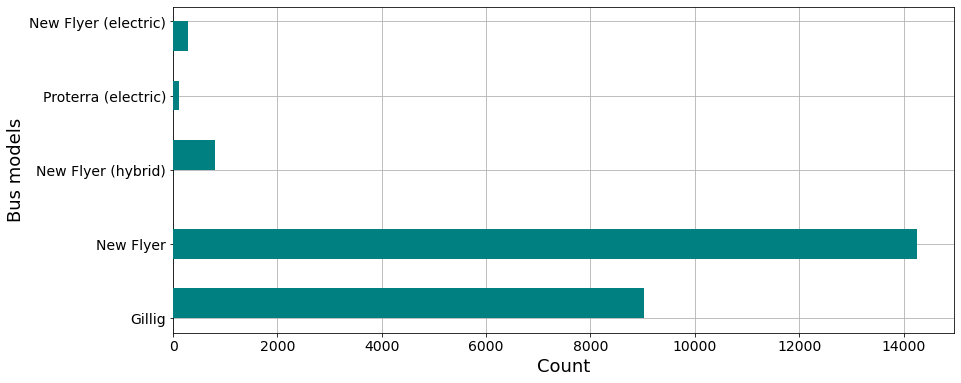

In [53]:
fig, ax = plt.subplots()
df2['model'].hist(figsize = (14,6), orientation='horizontal', color='teal', zorder=3)
plt.ylabel("Bus models", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [54]:
df2['date'] = pd.to_datetime(df2['Transaction Date']).dt.date

In [55]:
df2.to_csv(r'../../data/tidy/CTF Fuel Tickets FY22-tidy.csv')

In [56]:
### NTF (VATCo)

In [57]:
#xls3 = pd.ExcelFile(r'../../data/tidy/NTF Fuel Tickets FY22.xlsx')

In [58]:
#df2 = pd.read_excel(xls3, 'NTF')

In [59]:
#df2.head()

In [60]:
#df2['Model'].unique()

In [61]:
#df2['vehicle_year'] = df2['Model'].str[:4]
#df2.rename(columns = {'Model':'model'}, inplace = True)

In [62]:
#df2.to_csv(r'../../data/tidy/NTF Fuel Tickets FY22-tidy.csv')

In [63]:
df3 = pd.read_csv(r'../../data/tidy/NTF Fuel Tickets FY22-tidy.csv', delimiter=',', skiprows=0, low_memory=False)

In [64]:
df3.head()

,Unnamed: 0,model,vehicle_year,type,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type
0,0,2007 GILLIG 40`,2007,conventional,7610,25.8,7/1/2021 20:05,492882,DIE
1,1,2007 GILLIG 40`,2007,conventional,7610,18.8,7/2/2021 19:09,492984,DIE
2,2,2007 GILLIG 40`,2007,conventional,7610,20.8,7/3/2021 14:03,493087,DIE
3,3,2007 GILLIG 40`,2007,conventional,7610,24.6,7/6/2021 15:46,493224,DIE
4,4,2007 GILLIG 40`,2007,conventional,7610,24.0,7/7/2021 19:00,493327,DIE


In [65]:
df3['model'].unique()

array(['2007 GILLIG 40`', '2008 GILLIG 35`', '2009 GILLIG 40`',
       '2010 GILLIG 35`', '2011 NEW FLYER XD40', '2012 NEW FLYER XD40',
       '2013 NEW FLYER XDE60 (ARTIC) (HYBRID)', '2020 NEW FLYER XD35',
       '2021 NEW FLYER XD40', '2021 NEW FLYER XE40 (ELECTRIC)',
       '2022 NEW FLYER XD40'], dtype=object)

In [66]:
df3['model'].replace('2007 GILLIG 40`', 'GILLIG', inplace=True)
df3['model'].replace('2008 GILLIG 35`', 'GILLIG', inplace=True)
df3['model'].replace('2009 GILLIG 40`', 'GILLIG', inplace=True)
df3['model'].replace('2010 GILLIG 35`', 'GILLIG', inplace=True)
df3['model'].replace('2011 NEW FLYER XD40', 'NEW FLYER', inplace=True)
df3['model'].replace('2012 NEW FLYER XD40', 'NEW FLYER', inplace=True)
df3['model'].replace('2013 NEW FLYER XDE60 (ARTIC) (HYBRID)', 'NEW FLYER (HYBRID)', inplace=True)
df3['model'].replace('2020 NEW FLYER XD35', 'NEW FLYER', inplace=True)
df3['model'].replace('2021 NEW FLYER XD40', 'NEW FLYER', inplace=True)
df3['model'].replace('2021 NEW FLYER XE40 (ELECTRIC)', 'NEW FLYER (ELECTRIC)', inplace=True)
df3['model'].replace('2022 NEW FLYER XD40', 'NEW FLYER', inplace=True)

In [67]:
df3['model'].unique()

array(['GILLIG', 'NEW FLYER', 'NEW FLYER (HYBRID)',
       'NEW FLYER (ELECTRIC)'], dtype=object)

In [68]:
df3['model'].replace('GILLIG', 'Gillig', inplace=True)
df3['model'].replace('NEW FLYER', 'New Flyer', inplace=True)
df3['model'].replace('NEW FLYER (HYBRID)', 'New Flyer (hybrid)', inplace=True)
df3['model'].replace('PROTERRA (ELECTRIC)', 'Proterra (electric)', inplace=True)
df3['model'].replace('NEW FLYER (ELECTRIC)', 'New Flyer (electric)', inplace=True)

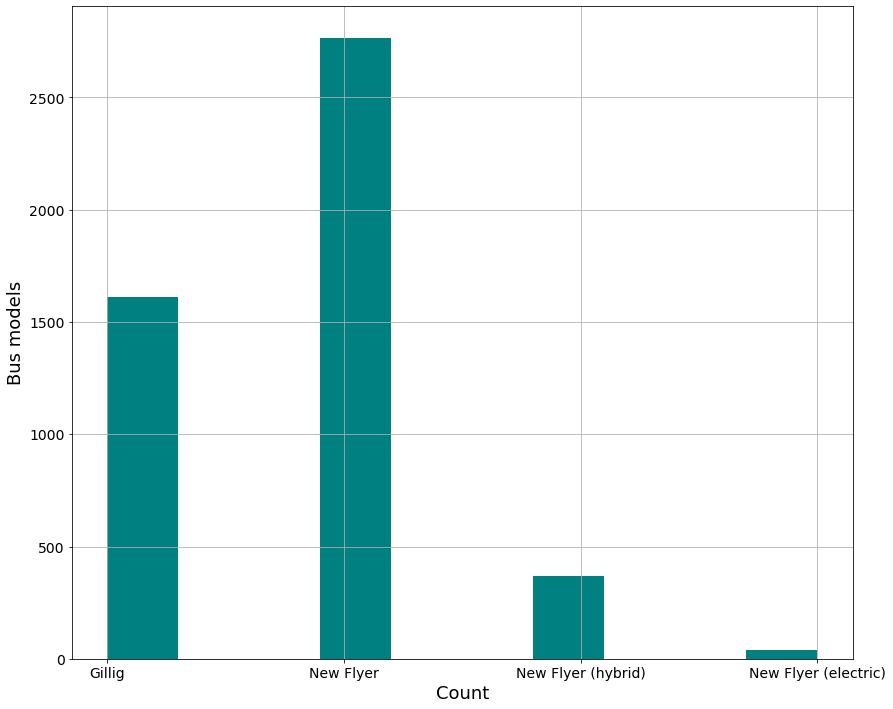

In [69]:
fig, ax = plt.subplots()
df3['model'].hist(figsize = (14,12), color='teal')
plt.ylabel("Bus models", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [70]:
df3['Transaction Date']= pd.to_datetime(df3['Transaction Date'])
df3['Transaction Date'].unique()

array(['2021-07-01T20:05:00.000000000', '2021-07-02T19:09:00.000000000',
       '2021-07-03T14:03:00.000000000', ...,
       '2022-06-22T17:06:00.000000000', '2022-06-25T14:00:00.000000000',
       '2022-06-29T06:13:00.000000000'], dtype='datetime64[ns]')

In [71]:
df3['date'] = pd.to_datetime(df3['Transaction Date']).dt.date

In [72]:
frames = [df2, df3]
result = pd.concat(frames)

In [73]:
vehicles23=result['Equipment ID'].unique()

In [74]:
vehicles23

array([1406, 1510, 1513, 1515, 1618, 1619, 1621, 1630, 1632, 1552, 1553,
       1554, 1555, 1556, 1557, 1558, 1559, 1561, 1562, 1640, 1641, 1642,
       1643, 1644, 1645, 1646, 1647, 1648, 1649, 1563, 1564, 1565, 1566,
       1567, 1568, 1569, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578,
       1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660,
       1661, 1662, 1663, 1664, 1701, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1801, 1802, 1803, 1804, 1805, 1821, 1822,
       1823, 1824, 1825, 1826, 1830, 1831, 1832, 1833, 1834, 1835, 1836,
       1837, 1710, 1711, 1712, 1713, 1714, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1670, 1671, 1672, 1673, 1715, 1716,
       1717, 1718, 1719, 1720, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
       1413, 1414, 1415, 1416, 1721, 1722, 1723, 1857, 1858, 1859, 1860,
       1861, 1320, 1321, 1322, 1323, 1420, 1421, 1724, 1725, 1726, 1727,
       1728, 1729, 1862, 1863, 1864, 3211, 3307, 33

In [75]:
vehicle1=df1['bus_number'].unique()

In [76]:
vehicle1

array([3112, 3115, 3118, 3119, 3121, 3122, 3123, 3201, 3202, 3203, 3204,
       3205, 3211, 3212, 3213, 3214, 3215, 3221, 3222, 3223, 3224, 3225,
       3226, 3227, 3228, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308,
       3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319,
       3320, 3321, 3322, 3323, 3324, 3325, 3326, 3401, 3402, 3501],
      dtype=int64)

In [77]:
len(vehicle1)

54

In [78]:
duplicate_vehicles = [d for d in vehicle1 if d in vehicles23]
duplicate_vehicles

[3211, 3307, 3308]

In [79]:
df1 = df1[df1['bus_number'] != 3211]
df1 = df1[df1['bus_number'] != 3307]
df1 = df1[df1['bus_number'] != 3308]

In [80]:
len(df1['bus_number'].unique())

51

In [81]:
result.columns

Index(['model', 'Equipment ID', 'Qty', 'Transaction Date', 'Meter1Reading',
       'Fuel Orfluid Type', 'vehicle_year', 'date', 'Unnamed: 0', 'type'],
      dtype='object')

In [82]:
mydict = {
  'Gillig': 'conventional',
  'New Flyer': 'conventional',
  'New Flyer (hybrid)': 'hybrid',
  'New Flyer (electric)': 'electric',
  'Proterra (electric)': 'electric',
}

In [83]:
df2['Powertrain'] = df2['model'].map(mydict)
df2['Powertrain'].unique()

array(['conventional', 'hybrid', 'electric'], dtype=object)

In [84]:
result['Powertrain'] = result['model'].map(mydict)
result['Powertrain'].unique()

array(['conventional', 'hybrid', 'electric'], dtype=object)

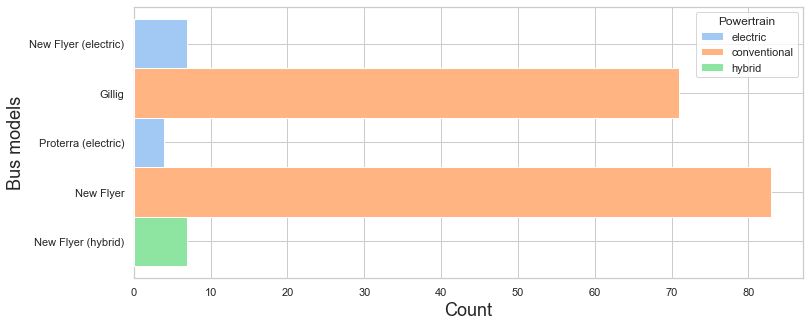

In [85]:
plot=result.groupby(by=['Equipment ID'])['model'].max()
df_plot = result.groupby('Equipment ID').agg({'model':'max', 'Powertrain':'max'})[['model','Powertrain']].reset_index()
df_plot
sns.set(rc={'figure.figsize':(12,5)})
sns.set_theme(style="whitegrid", palette="pastel")
p = sns.histplot(data=df_plot, y='model', hue="Powertrain", zorder=3, alpha  = 1)
p.set_ylabel("Bus models", fontsize=18)
p.set_xlabel("Count", fontsize=18)
#p.set_xticks(fontsize=14)
#p.set_yticks(fontsize=14)
figure = p.get_figure()    
figure.savefig(r'../../figures/hist-fleet-models.png', dpi=400, bbox_inches='tight')

In [86]:
#df_plot2 = result.groupby('Equipment ID').agg({'model':'max', 'Powertrain':'max', 'vehicle_year':'max'})[['model','Powertrain','vehicle_year']].reset_index()
#df_transition=df_plot2[df_plot2['vehicle_year']!='UMTS']
#df_transition.groupby(['vehicle_year', 'model']).size()

In [87]:
df_transition=df_plot[df_plot['vehicle_year']!='UMTS']
df_transition['vehicle_year']=df_transition['vehicle_year'].astype(int)
pd.crosstab(df_transition['vehicle_year'],df_transition['Powertrain']).plot.bar()
plt.ylabel("Count", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig(r'../../figures/year-transition-powertrain.png', dpi=400, bbox_inches='tight')
plt.show()

KeyError: 'vehicle_year'

In [ ]:
fig, ax = plt.subplots()
data=result.groupby(by=['Equipment ID'])['model'].max()
#result['model'].groupby('Equipment ID').hist(figsize = (14,12), color='teal')
data.hist(figsize = (14,6),  orientation='horizontal', color='teal', zorder=3)
plt.ylabel("Bus models", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig(r'../../figures/hist-fleet-models.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
res = result.pivot_table(index='Equipment ID', columns='model', aggfunc='count', fill_value=0)
res

In [ ]:
veh = df1['bus_number'].unique()
data=result.loc[result['Equipment ID'].isin(veh)],

In [ ]:
#data['Equipment ID'].unique()
data

In [ ]:
len(result['Equipment ID'].unique())

In [ ]:
df1

In [88]:
#df1_sum['date']= pd.to_datetime(df1['date'])

In [89]:
len(df1['bus_number'].unique())

51

In [90]:
len(df1['date'].unique())

3264

In [91]:
df1_sum = df1.groupby(['bus_number', 'date']).agg({'gallons': "sum"}).reset_index()
df1_sum

,bus_number,date,gallons
0,3112,2013-08-01,2.4
1,3112,2013-09-03,38.3
2,3112,2013-09-04,30.6
3,3112,2013-09-05,25.4
4,3112,2013-09-06,4.2
...,...,...,...
44685,3501,2022-05-20,0.5
44686,3501,2022-05-27,0.6
44687,3501,2022-06-03,0.6
44688,3501,2022-06-18,0.5


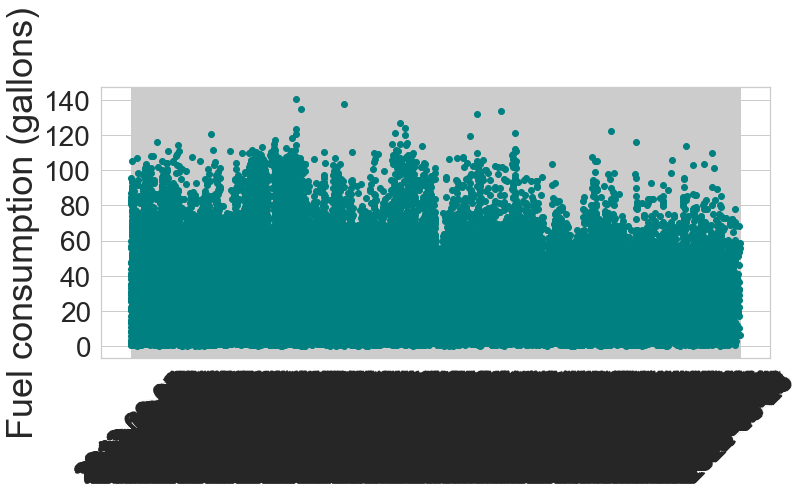

In [92]:
#fig, ax = plt.subplots()
#figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=df1_sum['date']  , y=df1_sum["gallons"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
#myFmt = mdates.DateFormatter('%Y')
#ax.xaxis.set_major_formatter(myFmt)
plt.ylabel("Fuel consumption (gallons)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
plt.savefig(r'../../figures/fuel-consumption-UMTS.png', dpi=400, bbox_inches='tight')
plt.show()

In [93]:
UMTS_daily_fuel_consumption=df1_sum['gallons'].mean()
UMTS_daily_fuel_consumption

34.38426269859017

In [94]:
#df2['date'] = pd.to_datetime(df2['Transaction Date']).dt.date
#df2['time'] = pd.to_datetime(df2['Transaction Date']).dt.time
df2_sum = df2.groupby(['Equipment ID', 'date']).agg({'Qty': "sum", }).reset_index()
df2_sum

,Equipment ID,date,Qty
0,1320,2021-12-03,3.60
1,1320,2021-12-07,0.65
2,1320,2022-01-28,1.76
3,1320,2022-01-31,0.57
4,1320,2022-02-01,1.14
...,...,...,...
23664,3308,2021-10-18,24.11
23665,3308,2021-10-19,8.29
23666,3308,2021-10-21,13.04
23667,3308,2021-10-22,6.88


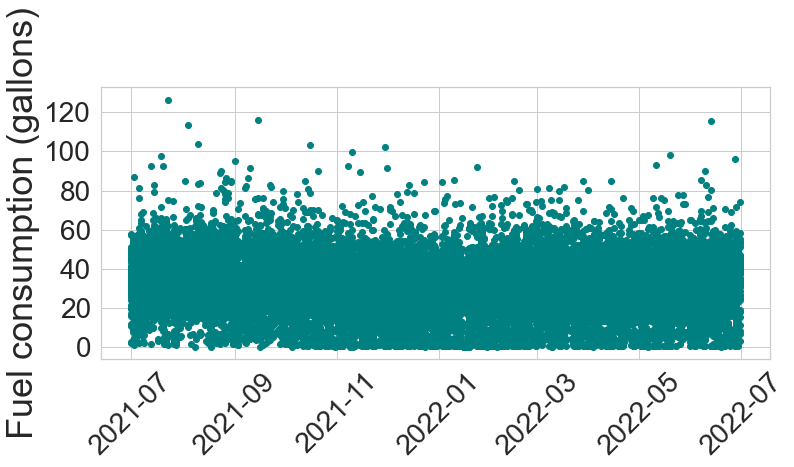

In [95]:
#figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=df2_sum['date']  , y=df2_sum["Qty"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
plt.ylabel("Fuel consumption (gallons)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
plt.savefig(r'../../figures/fuel-consumption-VATCo.png', dpi=400, bbox_inches='tight')
plt.show()

In [96]:
VATCo_daily_fuel_consumption=df2_sum['Qty'].mean()
VATCo_daily_fuel_consumption

32.14679876631923

In [97]:
#df3['date'] = pd.to_datetime(df3['Transaction Date']).dt.date
#df3['time'] = pd.to_datetime(df3['Transaction Date']).dt.time
df3_sum = df3.groupby(['Equipment ID', 'date']).agg({'Qty': "sum"}).reset_index()
df3_sum

,Equipment ID,date,Qty
0,7550,2021-07-03,36.0
1,7550,2021-07-05,27.1
2,7550,2021-07-06,26.5
3,7550,2021-07-07,26.7
4,7550,2021-07-08,24.4
...,...,...,...
3832,7902,2022-05-07,23.0
3833,7902,2022-05-09,41.0
3834,7902,2022-05-10,43.9
3835,7902,2022-05-11,19.5


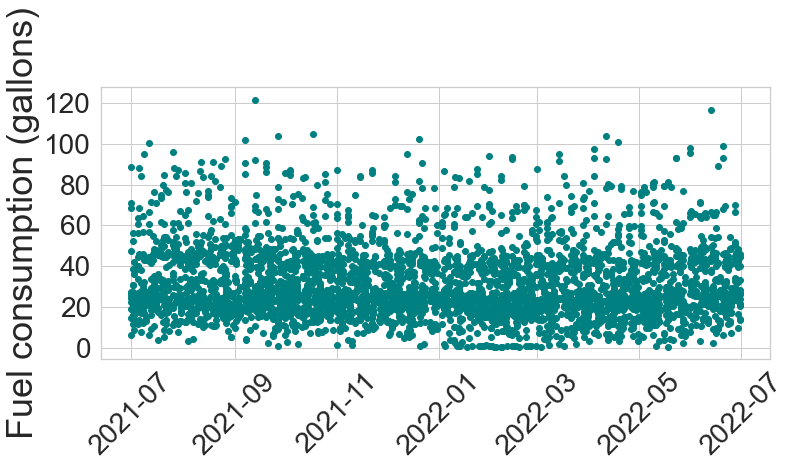

In [98]:
#figure(figsize=(14, 9.5), dpi=300)
plt.plot_date(x=df3_sum['date']  , y=df3_sum["Qty"], fmt='o', tz=None, xdate=True, ydate=False, color='teal')
plt.ylabel("Fuel consumption (gallons)", fontsize=36)
plt.xticks(fontsize=28, rotation = 45)
plt.yticks(fontsize=28)
plt.savefig(r'../../figures/fuel-consumption-Cottage Street.png', dpi=400, bbox_inches='tight')
plt.show()

In [99]:
df1

,timestamp,bus_number,gallons,mileage,previous_mileage,date,time,time_delta,distance,time_delta_in_seconds
296,2013-08-01 15:53:00,3112,2.4,263624,263581.0,2013-08-01,15:53:00,NaT,NaN,NaN
628,2013-09-03 22:49:00,3112,38.3,263752,263624.0,2013-09-03,22:49:00,NaT,NaN,NaN
656,2013-09-04 22:46:00,3112,30.6,263860,263752.0,2013-09-04,22:46:00,NaT,NaN,NaN
689,2013-09-05 22:44:00,3112,25.4,263949,263860.0,2013-09-05,22:44:00,NaT,NaN,NaN
722,2013-09-06 22:41:00,3112,4.2,263966,263949.0,2013-09-06,22:41:00,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
59904,2022-05-20 23:36:00,3501,0.5,8227,7850.0,2022-05-20,23:36:00,NaT,NaN,NaN
59968,2022-05-27 23:17:00,3501,0.6,8669,8227.0,2022-05-27,23:17:00,NaT,NaN,NaN
60028,2022-06-03 23:59:00,3501,0.6,9138,8669.0,2022-06-03,23:59:00,NaT,NaN,NaN
60181,2022-06-18 00:09:00,3501,0.5,10241,9138.0,2022-06-18,00:09:00,NaT,NaN,NaN


In [100]:
df2

,model,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type,vehicle_year,date,Powertrain
0,Gillig,1406,44.36,2021-07-01 20:53:00,376123,DIE,2006,2021-07-01,conventional
1,Gillig,1406,8.06,2021-07-02 15:15:00,376170,DIE,2006,2021-07-02,conventional
2,Gillig,1510,21.07,2021-07-02 15:30:00,739085,DIE,2006,2021-07-02,conventional
3,Gillig,1510,44.99,2021-07-03 20:57:00,739308,DIE,2006,2021-07-03,conventional
4,Gillig,1510,32.45,2021-07-04 19:49:00,739464,DIE,2006,2021-07-04,conventional
...,...,...,...,...,...,...,...,...,...
24507,New Flyer,3308,24.11,2021-10-18 16:08:00,236365,DIE,UMTS,2021-10-18,conventional
24508,New Flyer,3308,8.29,2021-10-19 15:35:00,0,DIE,UMTS,2021-10-19,conventional
24509,New Flyer,3308,13.04,2021-10-21 15:39:00,236474,DIE,UMTS,2021-10-21,conventional
24510,New Flyer,3308,6.88,2021-10-22 08:34:00,236496,DIE,UMTS,2021-10-22,conventional


In [101]:
df3

,Unnamed: 0,model,vehicle_year,type,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type,date
0,0,Gillig,2007,conventional,7610,25.8,2021-07-01 20:05:00,492882,DIE,2021-07-01
1,1,Gillig,2007,conventional,7610,18.8,2021-07-02 19:09:00,492984,DIE,2021-07-02
2,2,Gillig,2007,conventional,7610,20.8,2021-07-03 14:03:00,493087,DIE,2021-07-03
3,3,Gillig,2007,conventional,7610,24.6,2021-07-06 15:46:00,493224,DIE,2021-07-06
4,4,Gillig,2007,conventional,7610,24.0,2021-07-07 19:00:00,493327,DIE,2021-07-07
...,...,...,...,...,...,...,...,...,...,...
4781,4781,New Flyer,2022,conventional,7817,6.3,2022-06-20 16:58:00,2826,DIE,2022-06-20
4782,4782,New Flyer,2022,conventional,7817,38.9,2022-06-22 06:35:00,3014,DIE,2022-06-22
4783,4783,New Flyer,2022,conventional,7817,6.5,2022-06-22 17:06:00,3062,DIE,2022-06-22
4784,4784,New Flyer,2022,conventional,7817,22.2,2022-06-25 14:00:00,3173,DIE,2022-06-25


In [102]:
#df1_april2022 = df1[["timestamp", "bus_number", 'gallons', 'date']].copy()
#df1_april2022 = df1_april2022.groupby('date').agg({'model':'max', 'Powertrain':'max'})[['model','Powertrain']].reset_index()

In [103]:
df1['Powertrain']='conventional'
df1_clean = df1[["timestamp", "bus_number", 'gallons', 'date', 'Powertrain']].copy()
df1_clean.rename(
    columns={"bus_number":"equipment_id",
                "Qty":"gallons"}
          ,inplace=True)

In [104]:
df1_clean['date']=pd.to_datetime(df1_clean['date'])

In [105]:
df2_clean = df2[["Transaction Date", "Equipment ID", 'Qty', 'date', 'Powertrain']].copy()
df2_clean.rename(
    columns={"Transaction Date":"timestamp",
             "Equipment ID":"equipment_id",
             "Qty":"gallons"}
          ,inplace=True)

In [106]:
df2_clean['date']=pd.to_datetime(df2_clean['date'])

In [107]:
df3_clean = df3[["Transaction Date", "Equipment ID", 'Qty', 'date', 'type']].copy()
df3_clean.rename(
    columns={"Transaction Date":"timestamp",
             "Equipment ID":"equipment_id",
             "Qty":"gallons",
             "type": "Powertrain"}
          ,inplace=True)

In [108]:
df3_clean['date']=pd.to_datetime(df3_clean['date'])

In [109]:
frames = [df1_clean, df2_clean, df3_clean]
  
df_energy_validation = pd.concat(frames)
df_energy_validation

,timestamp,equipment_id,gallons,date,Powertrain
296,2013-08-01 15:53:00,3112,2.4,2013-08-01,conventional
628,2013-09-03 22:49:00,3112,38.3,2013-09-03,conventional
656,2013-09-04 22:46:00,3112,30.6,2013-09-04,conventional
689,2013-09-05 22:44:00,3112,25.4,2013-09-05,conventional
722,2013-09-06 22:41:00,3112,4.2,2013-09-06,conventional
...,...,...,...,...,...
4781,2022-06-20 16:58:00,7817,6.3,2022-06-20,conventional
4782,2022-06-22 06:35:00,7817,38.9,2022-06-22,conventional
4783,2022-06-22 17:06:00,7817,6.5,2022-06-22,conventional
4784,2022-06-25 14:00:00,7817,22.2,2022-06-25,conventional


In [110]:
df_energy_validation['date']=pd.to_datetime(df_energy_validation['date'])

In [111]:
len(df_energy_validation['equipment_id'].unique())

223

In [112]:
df_energy_validation.to_csv(r'../../data/tidy/energy_validation.csv')

In [113]:
selected_dates=['2022-04-01','2022-04-01','2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07',
                '2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13','2022-04-14','2022-04-15','2022-04-16',
                '2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23','2022-04-24','2022-04-25',
                '2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
df_energy_validation_april2022=df_energy_validation.loc[df_energy_validation.date.isin(selected_dates)]

In [114]:
df_energy_validation_april2022

,timestamp,equipment_id,gallons,date,Powertrain
58949,2022-04-01 18:59:00,3212,10.1,2022-04-01,conventional
59065,2022-04-07 01:01:00,3212,29.3,2022-04-07,conventional
59092,2022-04-08 05:33:00,3212,52.0,2022-04-08,conventional
59100,2022-04-08 23:20:00,3212,25.1,2022-04-08,conventional
59125,2022-04-10 05:38:00,3212,54.1,2022-04-10,conventional
...,...,...,...,...,...
4682,2022-04-26 19:12:00,7816,51.6,2022-04-26,conventional
4683,2022-04-27 20:39:00,7816,19.3,2022-04-27,conventional
4684,2022-04-28 14:02:00,7816,14.0,2022-04-28,conventional
4685,2022-04-29 19:10:00,7816,18.4,2022-04-29,conventional


In [115]:
len(df_energy_validation_april2022['equipment_id'].unique())

174

In [116]:
df_energy_validation_april2022.to_csv(r'../../data/tidy/energy_validation_april2022.csv')

In [117]:
df_energy_validation_april2022

,timestamp,equipment_id,gallons,date,Powertrain
58949,2022-04-01 18:59:00,3212,10.1,2022-04-01,conventional
59065,2022-04-07 01:01:00,3212,29.3,2022-04-07,conventional
59092,2022-04-08 05:33:00,3212,52.0,2022-04-08,conventional
59100,2022-04-08 23:20:00,3212,25.1,2022-04-08,conventional
59125,2022-04-10 05:38:00,3212,54.1,2022-04-10,conventional
...,...,...,...,...,...
4682,2022-04-26 19:12:00,7816,51.6,2022-04-26,conventional
4683,2022-04-27 20:39:00,7816,19.3,2022-04-27,conventional
4684,2022-04-28 14:02:00,7816,14.0,2022-04-28,conventional
4685,2022-04-29 19:10:00,7816,18.4,2022-04-29,conventional


In [118]:
#df_energy_validation_april2022
df_total_daily_consumption = df_energy_validation_april2022.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [119]:
df_total_daily_consumption

,date,gallons
0,2022-04-01,3727.41
1,2022-04-02,2349.44
2,2022-04-03,1002.96
3,2022-04-04,3371.27
4,2022-04-05,3443.58
5,2022-04-06,3293.63
6,2022-04-07,3349.11
7,2022-04-08,3299.17
8,2022-04-09,2157.32
9,2022-04-10,1003.39


In [120]:
df_total_daily_consumption['date']=pd.to_datetime(df_total_daily_consumption['date'])

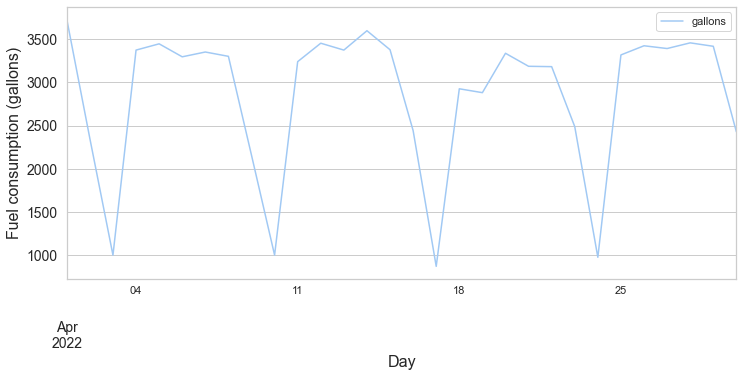

In [121]:
fig=df_total_daily_consumption.plot(x="date", y="gallons")
plt.ylabel("Fuel consumption (gallons)", fontsize=16)
plt.xlabel("Day", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(r'../../figures/fuel-consumption-CDB.png', dpi=400, bbox_inches='tight')
plt.show()

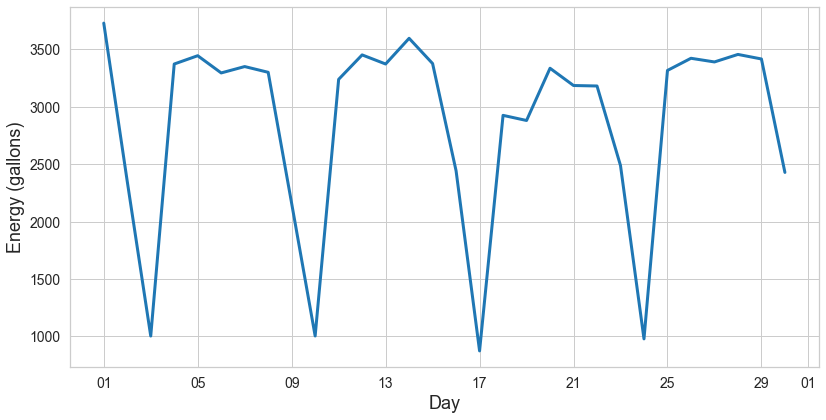

In [122]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(12, 6))

fig=plt.plot(df_total_daily_consumption.date, df_total_daily_consumption.gallons, c='#1f77b4', 
         linewidth=3)

# Add title and labels

plt.xlabel('Day', fontsize=18)
plt.ylabel('Energy (gallons)', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend

#plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/fuel-consumption-diesel.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [123]:
df_total_daily_consumption['gallons'].mean()

2857.782

In [124]:
df_total_daily_consumption['gallons'].median()

3296.4

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
df_total_daily_consumption_HEB.plot(x="date", y="gallons")
plt.ylabel("Fuel consumption (gallons)", fontsize=16)
plt.xlabel("Day", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)
plt.savefig(r'../../figures/fuel-consumption-CDB.png', dpi=400, bbox_inches='tight')
plt.show()